In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
red_wine = pd.read_csv("winequality-red.csv",sep=";")  #file contained more extra characters ( quotation marks, needed to use sep to idicate taht columns are separeted by semicolons)
red_wine.head()
red_wine.tail()
red_wine.shape
red_wine.head()
red_wine.columns

red_wine[red_wine.duplicated(keep="first")]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [35]:
red_wine["quality_label"] = red_wine["quality"].apply(
    lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high'
)

# Convert the 'quality_label' column to a categorical type with an ordered range
red_wine["quality_label"] = pd.Categorical(
    red_wine["quality_label"],
    categories=["low", "medium", "high"],
    ordered=True
)
red_wine.head()
red_wine.columns = red_wine.columns.str.replace(" ","_")
#columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       #'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       #'pH', 'sulphates', 'alcohol', 'quality']
nan_count = red_wine.isna().sum()
nan_count



fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
SO2_ratio               0
dtype: int64

In [33]:
white_wine = pd.read_csv("winequality-white.csv",sep=";")
white_wine.columns

white_wine["quality_label"] = white_wine["quality"].apply(
    lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high'
)

white_wine["quality_label"] = pd.Categorical(
    white_wine["quality_label"],
    categories=["low", "medium", "high"],
    ordered = True
)
white_wine.columns = white_wine.columns.str.replace(" ","_")
nan_count = white_wine.isna().sum()
nan_count
white_wine.head()
nan_count

white_wine[white_wine.duplicated(keep="first")]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality quality_label  
4      9.900000        6        medium  
5     10.100000        6        medium  
7      8.800000        6        medium  
8      9.500000        6        medium  
20    12.800000        8          high  
...         ...      ...           ...  
4828   9.200000        5           low  
4850  11.100000        6        medium  
4851   9.600000        5           low  
4856   9.000000        6        medium  
4880   9.533333        6        medium  

[937 rows x 13 columns]

### Add a column "wine_type"

In [34]:
white_wine["wine_type"] = "white"
red_wine["wine_type"] = "red"

all_wines = pd.concat([red_wine,white_wine], axis= 0)

all_wines["wine_type"] = pd.Categorical(
    all_wines["wine_type"],
    categories=["white", "red"],
    ordered = True
)

all_wines


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_label wine_type  SO2_ratio  
0         9.4        5           low       red   0.323529  
1         9.8        5           low       red   0.373134  
2         9.8        5           low       red   0.277778  
3         9.8        6        medium       red   0.283333  
4         9.4        5           low       red   0.323529  
...       ...      ...           ...       ...        ...  
4893     11.2        6        medium     white        NaN  
4894      9.6        5           low     white        NaN  
4895      9.4        6        medium     white        NaN  
4896     12.8        7        medium     white        NaN  
4897     11.8        6        medium     white        NaN  

[6497 rows x 15 columns]

### Compare descriptive statistics between red and white wines:

In [7]:
rnw = pd.concat([red_wine.describe(), white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
pd.set_option("display.max_columns", None)  # Show all columns
rnw

Red Wines Stats                                               \
        fixed_acidity volatile_acidity  citric_acid residual_sugar   
count     1599.000000      1599.000000  1599.000000    1599.000000   
mean         8.319637         0.527821     0.270976       2.538806   
std          1.741096         0.179060     0.194801       1.409928   
min          4.600000         0.120000     0.000000       0.900000   
25%          7.100000         0.390000     0.090000       1.900000   
50%          7.900000         0.520000     0.260000       2.200000   
75%          9.200000         0.640000     0.420000       2.600000   
max         15.900000         1.580000     1.000000      15.500000   

                                                                          \
         chlorides free_sulfur_dioxide total_sulfur_dioxide      density   
count  1599.000000         1599.000000          1599.000000  1599.000000   
mean      0.087467           15.874922            46.467792     0.996747   
std       0.047065           10.460157            32.895324     0.001887   
min       0.012000            1.000000             6.000000     0.990070   
25%       0.070000            7.000000            22.000000     0.995600   
50%       0.079000           14.000000            38.000000     0.996750   
75%       0.090000           21.000000            62.000000     0.997835   
max       0.611000           72.000000           289.000000     1.003690   

                                                          White Wines Stats  \
                pH    sulphates      alcohol      quality     fixed_acidity   
count  1599.000000  1599.000000  1599.000000  1599.000000       4898.000000   
mean      3.311113     0.658149    10.422983     5.636023          6.854788   
std       0.154386     0.169507     1.065668     0.807569          0.843868   
min       2.740000     0.330000     8.400000     3.000000          3.800000   
25%       3.210000     0.550000     9.500000     5.000000          6.300000   
50%       3.310000     0.620000    10.200000     6.000000          6.800000   
75%       3.400000     0.730000    11.100000     6.000000          7.300000   
max       4.010000     2.000000    14.900000     8.000000         14.200000   

                                                                 \
      volatile_acidity  citric_acid residual_sugar    chlorides   
count      4898.000000  4898.000000    4898.000000  4898.000000   
mean          0.278241     0.334192       6.391415     0.045772   
std           0.100795     0.121020       5.072058     0.021848   
min           0.080000     0.000000       0.600000     0.009000   
25%           0.210000     0.270000       1.700000     0.036000   
50%           0.260000     0.320000       5.200000     0.043000   
75%           0.320000     0.390000       9.900000     0.050000   
max           1.100000     1.660000      65.800000     0.346000   

                                                                          \
      free_sulfur_dioxide total_sulfur_dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   
50%             34.000000           134.000000     0.993740     3.180000   
75%             46.000000           167.000000     0.996100     3.280000   
max            289.000000           440.000000     1.038980     3.820000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.0

In [8]:
all_wines[all_wines.duplicated(keep=False)]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
22              7.9              0.43         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
4851            6.4              0.33         0.44             8.9      0.055   
4855            7.1              0.23         0.39            13.7      0.058   
4856            7.1              0.23         0.39            13.7      0.058   
4879            6.6              0.34         0.40             8.1      0.046   
4880            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
22                   10.0                  37.0  0.99660  3.17       0.91   
...                   ...                   ...      ...   ...        ...   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4855                 26.0                 172.0  0.99755  2.90       0.46   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4879                 68.0                 170.0  0.99494  3.15       0.50   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality quality_label wine_type  
0      9.400000        5           low       red  
4      9.400000        5           low       red  
9     10.500000        5           low       red  
11    10.500000        5           low       red  
22     9.500000        5           low       red  
...         ...      ...           ...       ...  
4851   9.600000        5           low     white  
4855   9.000000        6        medium     white  
4856   9.000000        6        medium     white  
4879   9.533333        6        medium     white  
4880   9.533333        6        medium     white  

[2169 rows x 14 columns]

### Compare mean values between wines

In [9]:
compare = pd.concat([
    pd.Series([red_wine["fixed_acidity"].mean()], index = ["Fixed Acidity"]),
    pd.Series([white_wine["fixed_acidity"].mean()], index = ["Fixed Acidity"])],
    axis=1, keys=["Red Wine", "White Wine"])
compare

Red Wine  White Wine
Fixed Acidity  8.319637    6.854788

In [10]:
compare_mean = pd.DataFrame()

# Pętla dla każdej kolumny w red_wine
for column in all_wines.select_dtypes(include="number").columns:  #only numeric columns
    compare_mean[column] = pd.Series([          #pd.Series is a one-dim array holding data of any type
        red_wine[column].mean(),
        white_wine[column].mean(),
    ], index=["Red Wine", "White Wine"])

compare_mean

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
Red Wine         8.319637          0.527821     0.270976        2.538806   
White Wine       6.854788          0.278241     0.334192        6.391415   

            chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
Red Wine     0.087467            15.874922             46.467792  0.996747   
White Wine   0.045772            35.308085            138.360657  0.994027   

                  pH  sulphates    alcohol   quality  
Red Wine    3.311113   0.658149  10.422983  5.636023  
White Wine  3.188267   0.489847  10.514267  5.877909

### Quantity of red wines compared to the quantity of white wines

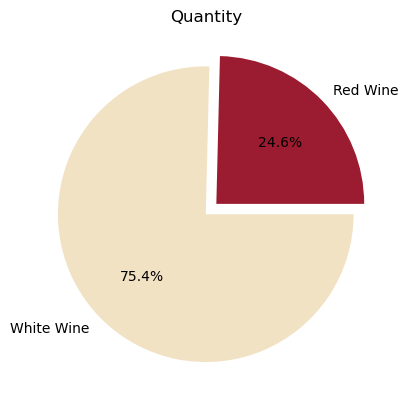

In [11]:
x = len(red_wine)
y = len(white_wine)

fig, ax = plt.subplots()
ax.pie([x,y],explode = [0.1,0], labels = ["Red Wine", "White Wine"],autopct='%1.1f%%', colors = ["#9B1B30","#F2E2C4"])
ax.set_title("Quantity")
plt.show()

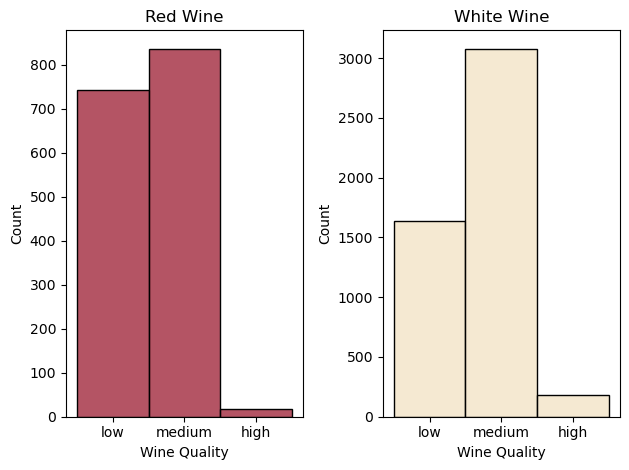

In [12]:
fig, ax = plt.subplots(1,2)
red = sns.histplot(x = red_wine["quality_label"], ax = ax[0],color = "#9B1B30")
white = sns.histplot(x = white_wine["quality_label"], ax = ax[1], color ="#F2E2C4")

red.set_xlabel("Wine Quality")
white.set_xlabel("Wine Quality")
red.set_title("Red Wine")
white.set_title("White Wine")
plt.tight_layout()


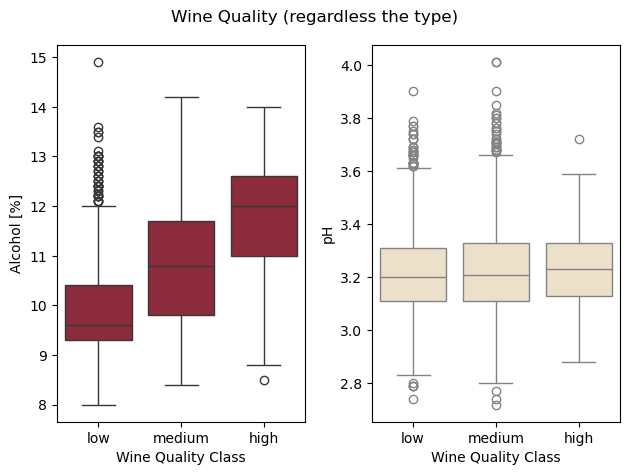

In [13]:
fig, ax = plt.subplots(1,2)

combined_wine_alc = pd.concat([red_wine[["quality_label", "alcohol"]],
                            white_wine[["quality_label", "alcohol"]]])

combined_wine_ph = pd.concat([red_wine[["quality_label", "pH"]],
                            white_wine[["quality_label", "pH"]]])

#sns.boxplot(data=combined_wine, color ={"Red Wine": "#9B1B30", "White Wine": "#F2E2C4"})

alc = sns.boxplot(x = combined_wine_alc["quality_label"],y = combined_wine_alc["alcohol"], ax = ax[0], color = "#9B1B30")
pH = sns.boxplot(x = combined_wine_ph["quality_label"],y = combined_wine_ph["pH"], ax = ax[1], color ="#F2E2C4")

alc.set_xlabel("Wine Quality Class")
alc.set_ylabel("Alcohol [%]")
pH.set_xlabel("Wine Quality Class")
pH.set_ylabel("pH")
fig.suptitle("Wine Quality (regardless the type)")
plt.tight_layout()

Axes(0.0969184,0.121412;0.387945x0.847338)
Axes(0.588618,0.121412;0.387945x0.847338)


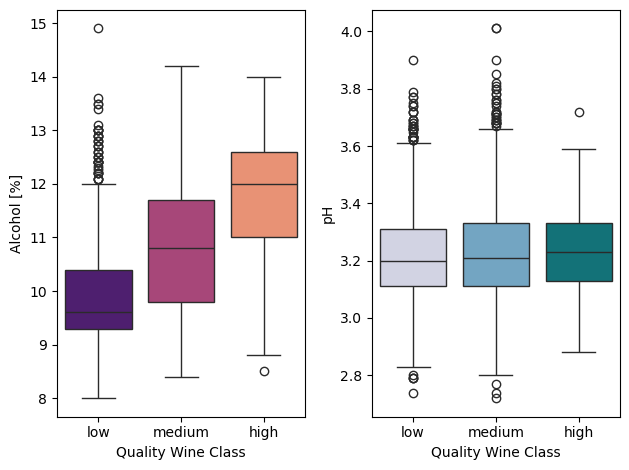

In [14]:
fig , ax  = plt.subplots(1,2)

#Boxplot Quality/Alcohol
alc = sns.boxplot(x = "quality_label", y = "alcohol", data = all_wines, ax = ax[0],hue = "quality_label", palette="magma")
alc.set_xlabel("Quality Wine Class")
alc.set_ylabel("Alcohol [%]")

#Boxplot Quality/pH
ph = sns.boxplot(x = "quality_label", y= "pH", data = all_wines, ax = ax[1], hue = "quality_label", palette="PuBuGn")
ph.set_xlabel("Quality Wine Class")
ph.set_ylabel("pH")

plt.tight_layout()
print(alc)
print(ph)

### Checking correlation between wine parameters and wine quality

#### Chlorides

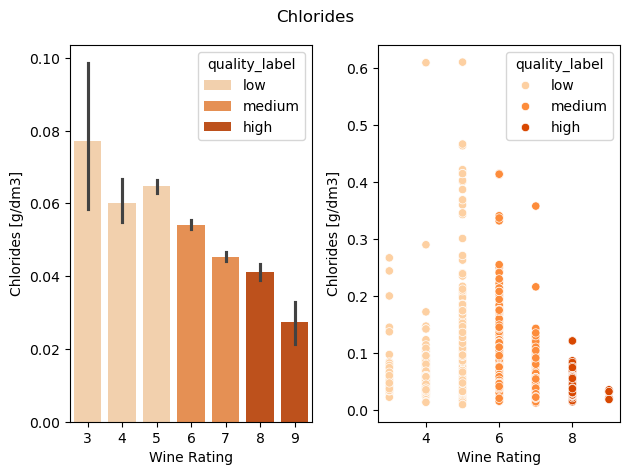

In [15]:
fig, ax = plt.subplots(1, 2)

chlorides_quality = sns.barplot(x = "quality", y = "chlorides", data = all_wines,ax = ax[0], hue = "quality_label", palette="Oranges")
chlorides_quality.set_xlabel("Wine Rating")
chlorides_quality.set_ylabel("Chlorides [g/dm3]")



chlorides_quality_1 = sns.scatterplot(x = "quality", y = "chlorides", data = all_wines, ax = ax[1], hue = "quality_label", palette="Oranges")
chlorides_quality_1.set_xlabel("Wine Rating")
chlorides_quality_1.set_ylabel("Chlorides [g/dm3]")


fig.suptitle("Chlorides")
plt.tight_layout()



#### Density

##### White Wine

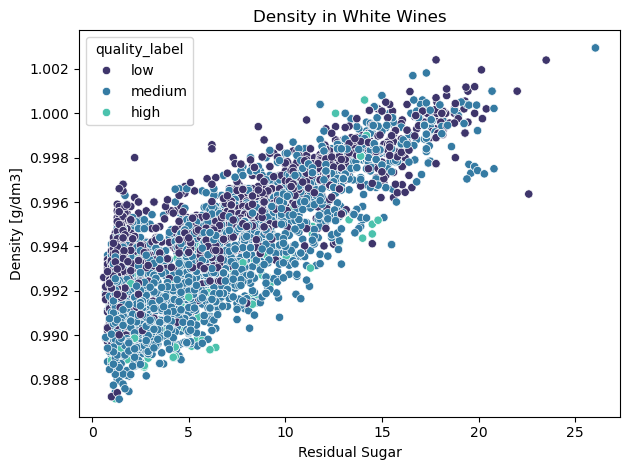

In [16]:
fig = plt.figure()
filtered = white_wine[white_wine["density"]<1.01]

density_quality = sns.scatterplot(x = "residual_sugar", y = "density", data= filtered, hue = "quality_label", palette="mako")

density_quality.set_xlabel("Residual Sugar")
density_quality.set_ylabel("Density [g/dm3]")

plt.title("Density in White Wines")
plt.tight_layout()


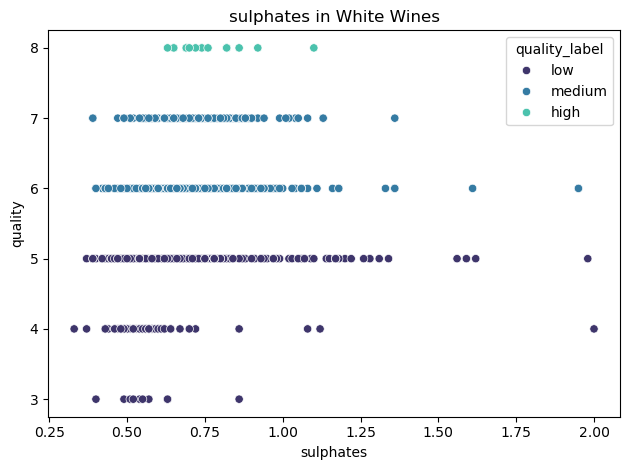

In [17]:
fig = plt.figure()


density_quality = sns.scatterplot(x = "sulphates", y = "quality", data= red_wine, hue = "quality_label", palette="mako")

density_quality.set_xlabel("sulphates")
density_quality.set_ylabel("quality")

plt.title("sulphates in White Wines")
plt.tight_layout()

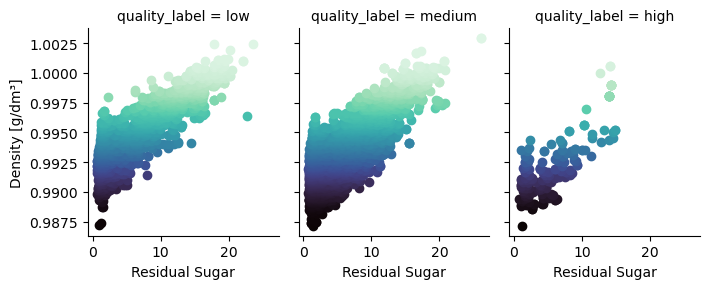

In [18]:
# Filter white wines with density < 1.01
filtered = white_wine[white_wine["density"] < 1.01]

# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(filtered, col="quality_label", aspect=0.8, height=3, hue="density", palette="mako")

# Apply hexbin plot for each subset
ax.map(plt.scatter, "residual_sugar", "density")

# Set axis labels
ax.set_axis_labels("Residual Sugar", "Density [g/dm³]")

# Show plot
plt.tight_layout()
plt.show()

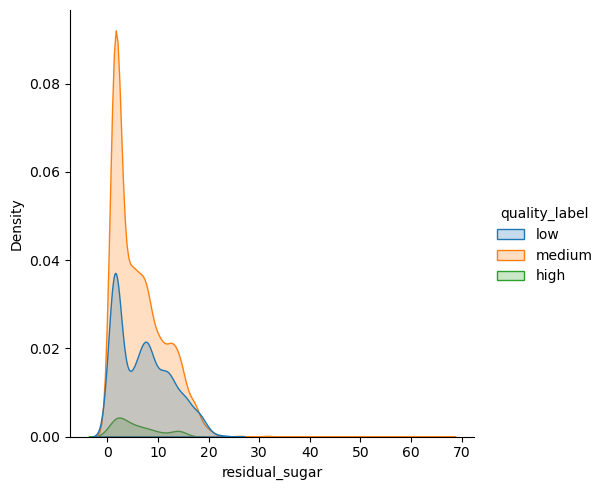

In [19]:
sns.displot(white_wine, x="residual_sugar", hue="quality_label", kind="kde", fill=True)

##### Red Wine

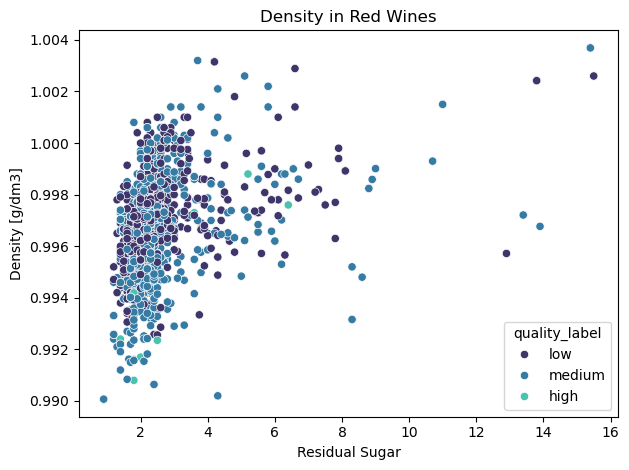

In [20]:
density_quality = sns.scatterplot(x = "residual_sugar", y = "density", data= red_wine, hue = "quality_label", palette="mako")

density_quality.set_xlabel("Residual Sugar")
density_quality.set_ylabel("Density [g/dm3]")
plt.title("Density in Red Wines")
plt.tight_layout()

Text(0, 0.5, 'Density')

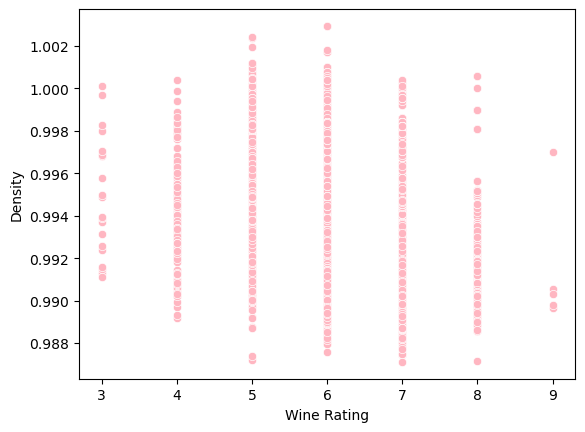

In [21]:
filtered = white_wine[white_wine["density"]< 1.01]
dens_white = sns.scatterplot(x = "quality", y = "density", data = filtered, color = "#ffb6c1")
dens_white.set_xlabel("Wine Rating")
dens_white.set_ylabel("Density")

### Fixed Acidity

Text(0, 0.5, 'Fixed Acidity')

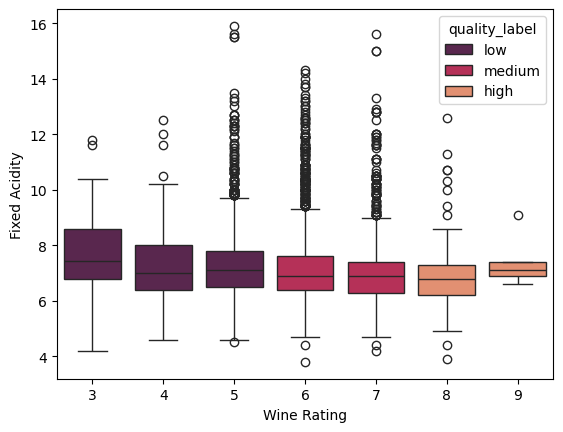

In [22]:
fixed_acidity = sns.boxplot(x = "quality", y = "fixed_acidity", data = all_wines, hue = "quality_label", palette="rocket")
fixed_acidity.set_xlabel("Wine Rating")
fixed_acidity.set_ylabel("Fixed Acidity")


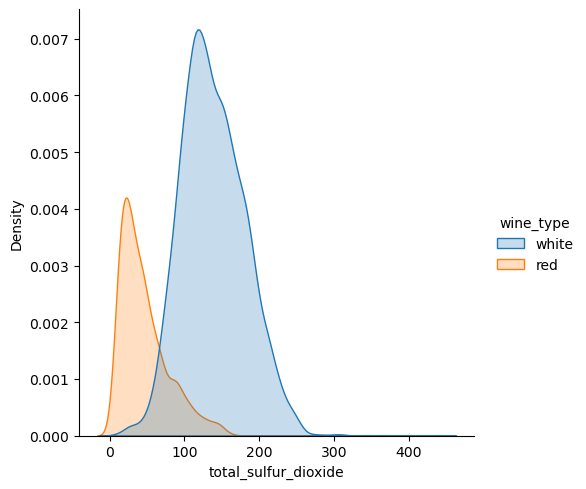

In [23]:
sns.displot(all_wines, x="total_sulfur_dioxide", hue="wine_type", kind="kde", fill=True)

### Free SO2 to Total

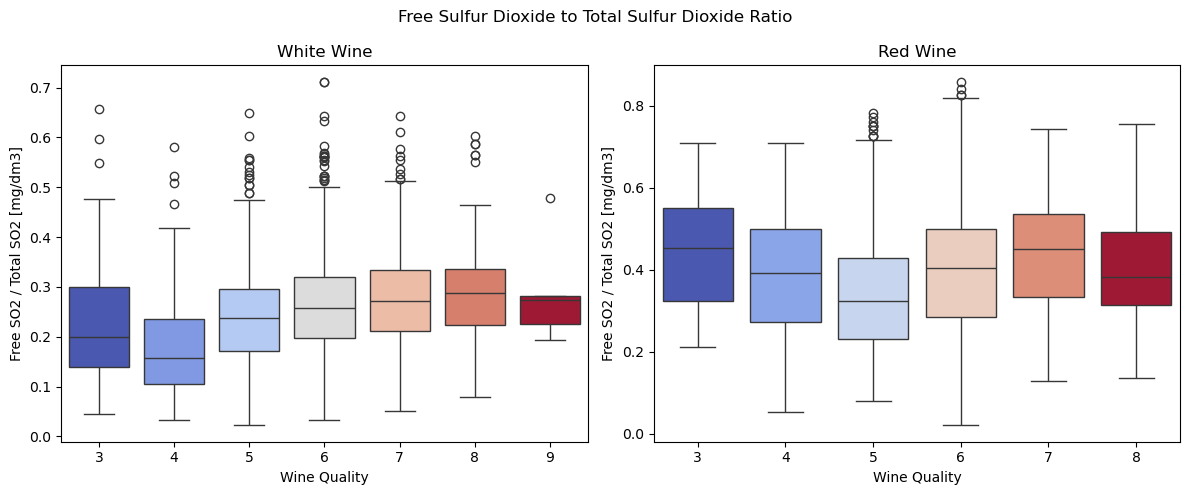

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,5))




white_wine["SO2_ratio"] = white_wine["free_sulfur_dioxide"]/white_wine["total_sulfur_dioxide"]
red_wine["SO2_ratio"] = red_wine["free_sulfur_dioxide"]/red_wine["total_sulfur_dioxide"]   
all_wines = pd.concat([red_wine,white_wine], axis= 0)



white_ratio  = sns.boxplot(x = "quality", y = "SO2_ratio", data = white_wine, ax = ax[0], hue = "quality", palette="coolwarm",legend = False)
white_ratio.set_xlabel("Wine Quality")
white_ratio.set_ylabel("Free SO2 / Total SO2 [mg/dm3]")
ax[0].set_title("White Wine")

                                  
red_ratio = sns.boxplot(x = "quality", y = "SO2_ratio", data = red_wine, ax = ax[1], hue = "quality", palette="coolwarm", legend = False)
red_ratio.set_xlabel("Wine Quality")
red_ratio.set_ylabel("Free SO2 / Total SO2 [mg/dm3]")
ax[1].set_title("Red Wine")


fig.suptitle("Free Sulfur Dioxide to Total Sulfur Dioxide Ratio")
plt.tight_layout()



#### pH vs SO2

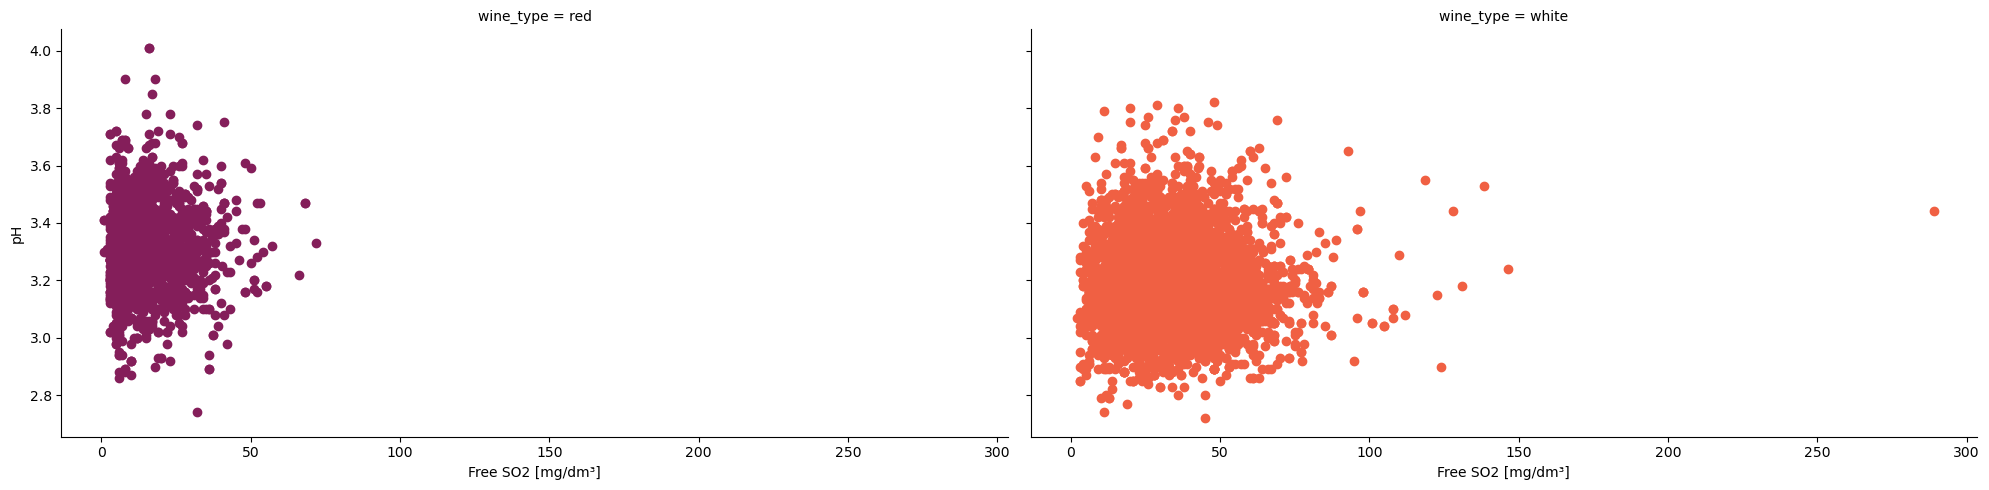

In [25]:
# # fig, ax = plt.subplot()

# pH_so2 = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = red_wine, hue = "quality_label", palette="rocket")
# pH_so2.set_xlabel("Free SO2")
# pH_so2.set_ylabel("pH")

# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(all_wines, col="wine_type", aspect=2.0, height=5, hue="wine_type", palette="rocket")

ax.map(plt.scatter, "free_sulfur_dioxide", "pH")

# Set axis labels
ax.set_axis_labels("Free SO2 [mg/dm³]", "pH")

# Show plot
plt.tight_layout()
plt.show()

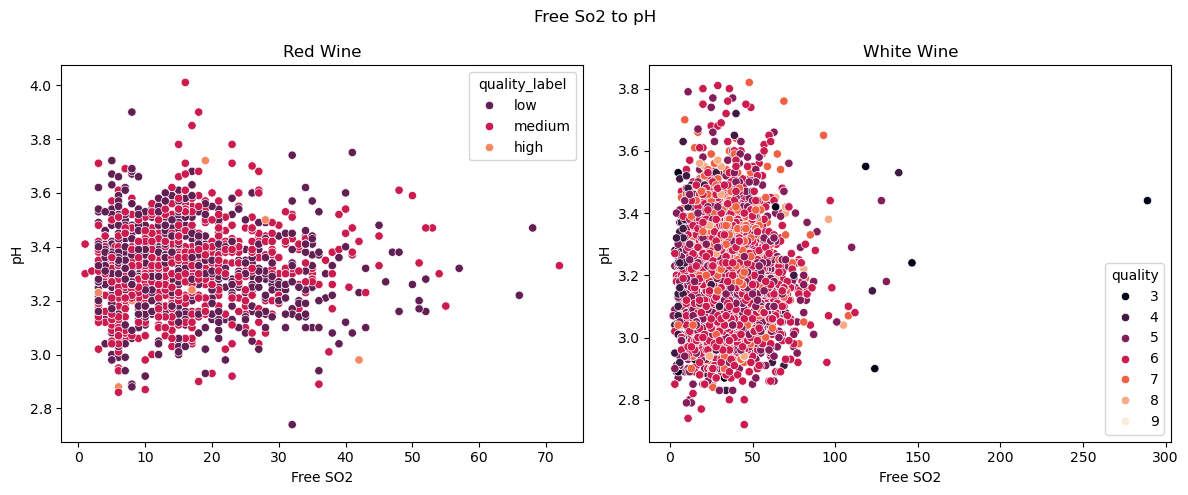

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = red_wine, ax = ax[0], hue="quality_label", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("pH")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("pH")
ax[1].set_title("White Wine")


fig.suptitle("Free So2 to pH")
plt.tight_layout()

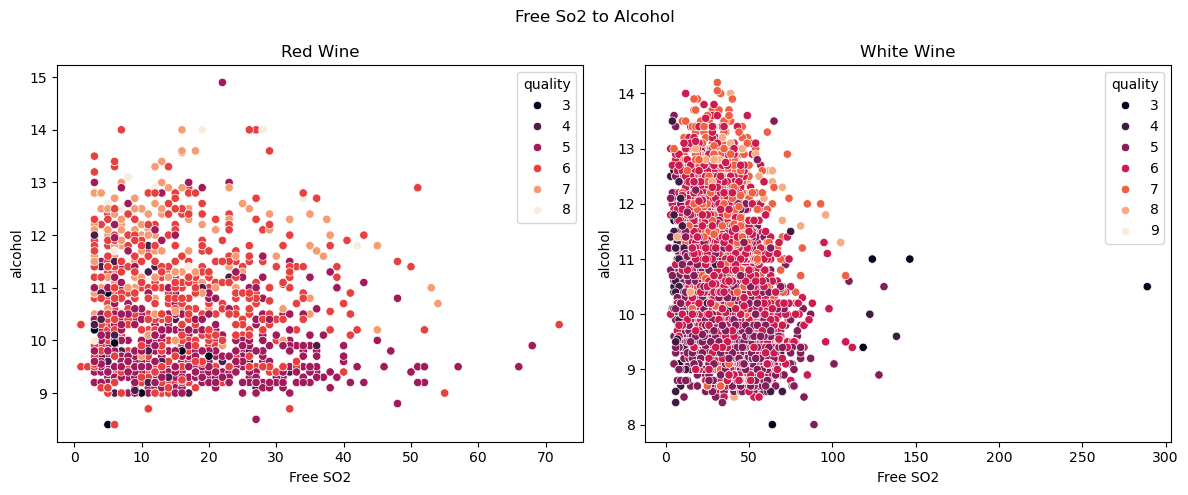

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "alcohol", data = red_wine, ax = ax[0], hue="quality", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("alcohol")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "alcohol", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("alcohol")
ax[1].set_title("White Wine")


fig.suptitle("Free So2 to Alcohol")
plt.tight_layout()

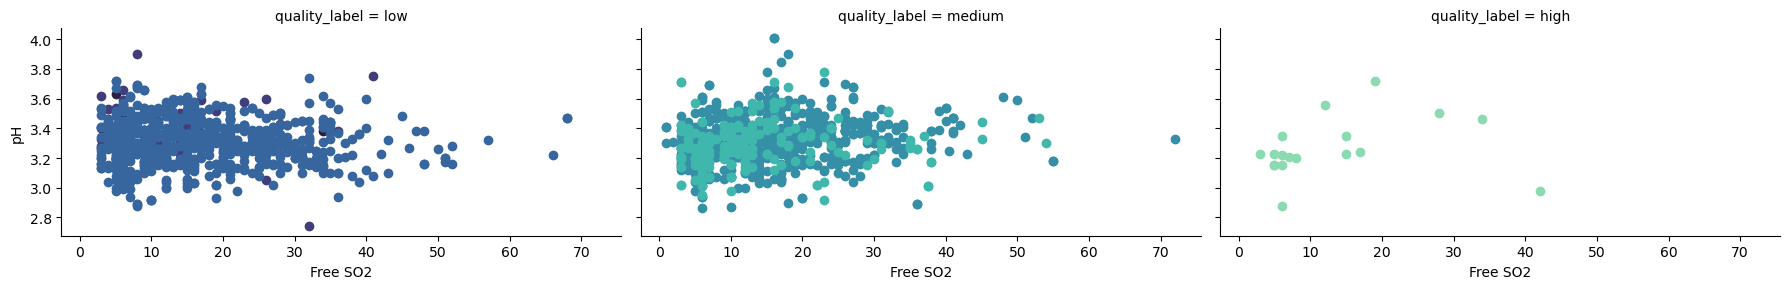

In [28]:
# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(red_wine, col="quality_label", aspect=2.0, height=3,hue = "quality", palette="mako")

# Apply hexbin plot for each subset
ax.map(plt.scatter, "free_sulfur_dioxide", "pH")

# Set axis labels
ax.set_axis_labels("Free SO2", "pH")

# Show plot
plt.tight_layout()
plt.show()

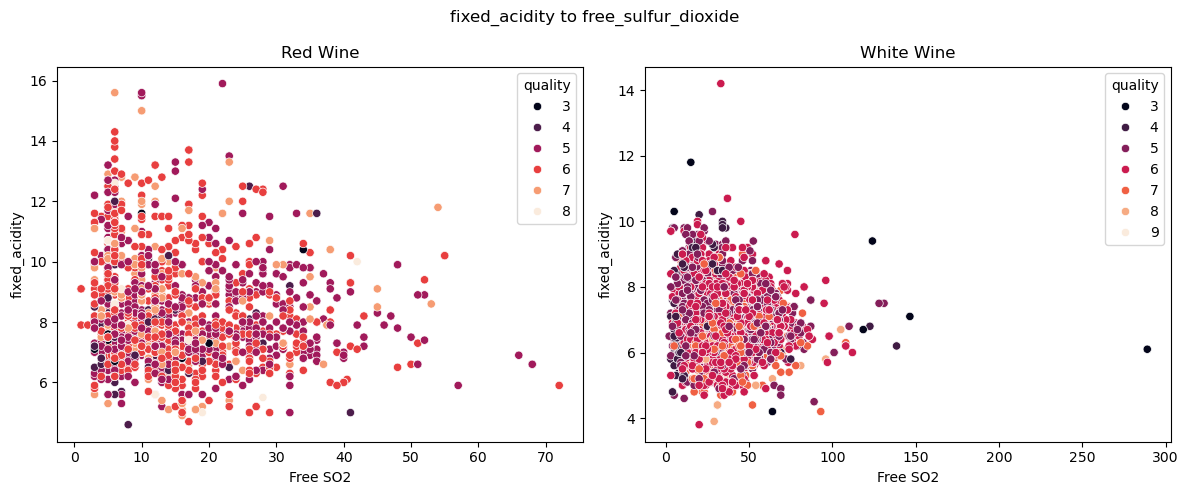

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "fixed_acidity", data = red_wine, ax = ax[0], hue="quality", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("fixed_acidity")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "fixed_acidity", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("fixed_acidity")
ax[1].set_title("White Wine")


fig.suptitle("fixed_acidity to free_sulfur_dioxide")
plt.tight_layout()

In [30]:
count_white = 0
for value in white_wine[white_wine["quality_label"] == "high"]["quality_label"]:
    count_white = count_white +1
count_red = 0
for value in red_wine[red_wine["quality_label"] == "high"]["quality_label"]:
    count_red = count_red +1

print(count_white)
print(count_red)

180
18


NameError: name 'remove_outliers' is not defined

<Figure size 640x480 with 0 Axes>

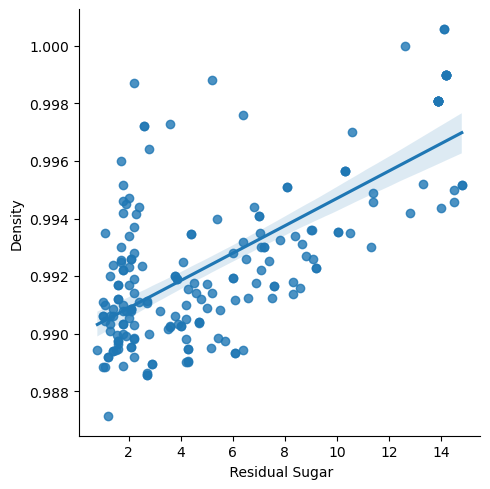

In [31]:
fig = plt.figure()

combined_wine_values = pd.concat([red_wine, white_wine])


high_quality_wine = combined_wine_values[combined_wine_values["quality_label"] == "high"]
# remove_outliers = combined_wine_values[combined_wine_values["density"] < 1.01]

# x = sns.scatterplot(x = high_quality_wine["density"],y = high_quality_wine["residual_sugar"])
x = sns.lmplot(data = high_quality_wine, x = "residual_sugar",y = "density")
x.set_xlabels(" Residual Sugar")
x.set_ylabels("Density")

y = sns.lmplot(data = remove_outliers, x = "fixed_acidity", y = "quality")
y.set_xlabels("Fixed Acidity")
y.set_ylabels("Quality")

z = sns.lmplot(data = combined_wine_values, x = "fixed_acidity", y = "pH")
z.set_xlabels("Fixed Acidity")
z.set_ylabels("pH")

z = sns.lmplot(data = combined_wine_values, x = "residual_sugar", y = "alcohol")
z.set_xlabels("Residual Sugar")
z.set_ylabels("Alcohol")


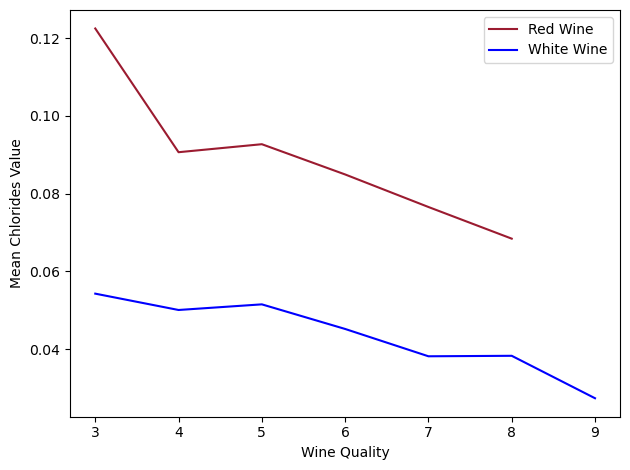

In [ ]:
# mean_chlorides_value = combined_wine_values.groupby("quality")["chlorides"].mean()

# mean_chlorides = sns.lineplot(x = mean_chlorides_value.index, y = mean_chlorides_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Chlorides [g/dm³]")
fig, ax = plt.subplots(1,1)
mean_chlorides_value_red = red_wine.groupby("quality")["chlorides"].mean()

mean_chlorides_red = sns.lineplot(x = mean_chlorides_value_red.index, y = mean_chlorides_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Chlorides Value")

mean_chlorides_value_white = white_wine.groupby("quality")["chlorides"].mean()

mean_chlorides_white = sns.lineplot(x = mean_chlorides_value_white.index, y = mean_chlorides_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Quality of wine'), Text(0, 0.5, 'Alcohol [%]')]

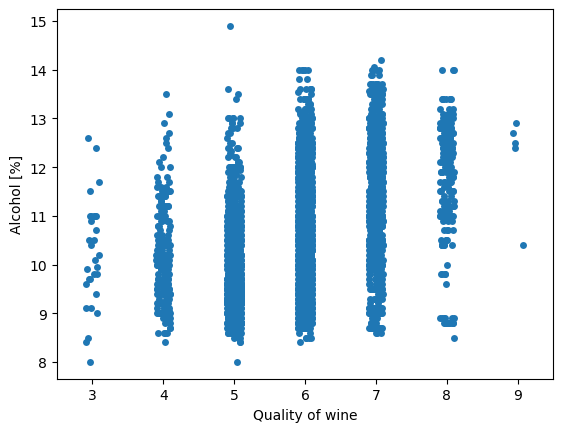

In [ ]:
r = sns.stripplot(data = combined_wine_values, x = "quality", y = "alcohol")
r.set(xlabel = "Quality of wine", ylabel = "Alcohol [%]", )


Data is not normally distributed


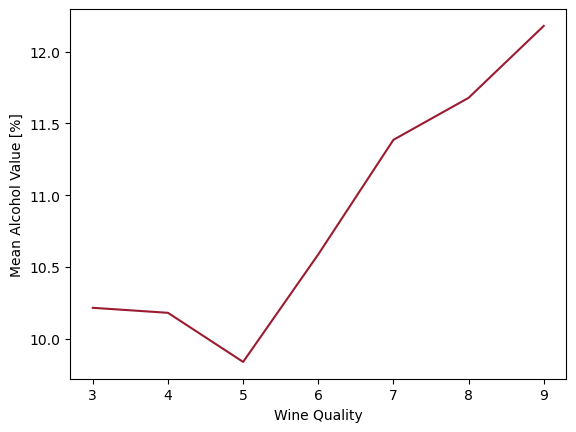

In [ ]:
# for white and red plot looks very similar, which means I can combine both wines

mean_alcohol_value = combined_wine_values.groupby("quality")["alcohol"].mean()

mean_alcohol = sns.lineplot(x = mean_alcohol_value.index, y = mean_alcohol_value.values, color="#9B1B30")
plt.xlabel("Wine Quality")
plt.ylabel("Mean Alcohol Value [%]")


from scipy import stats
# For alcohol content (example with red wine)
_, p_value = stats.shapiro(red_wine['alcohol'])
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

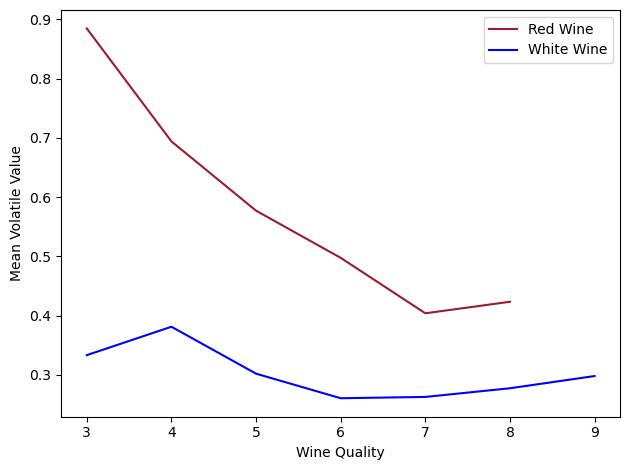

In [ ]:
fig, ax = plt.subplots(1,1)
# mean_volatile_value = combined_wine_values.groupby("quality")["volatile_acidity"].mean()

# mean_volatile = sns.lineplot(x = mean_volatile_value.index, y = mean_volatile_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Volatile Acidity Value")

mean_volatile_value_red = red_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_red = sns.lineplot(x = mean_volatile_value_red.index, y = mean_volatile_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Volatile Value")

mean_volatile_value_white = white_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_white = sns.lineplot(x = mean_volatile_value_white.index, y = mean_volatile_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

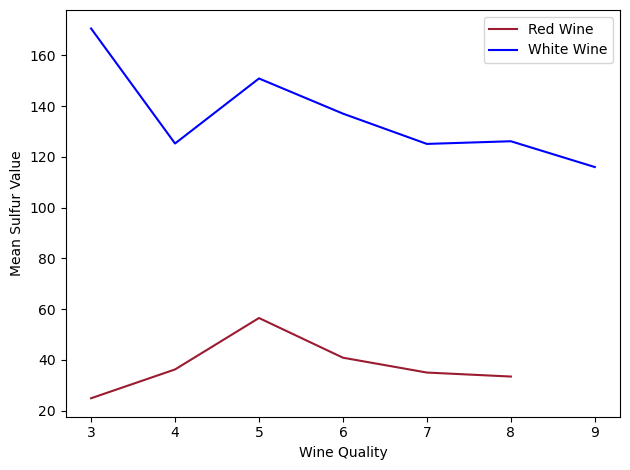

In [ ]:
# mean_sulfur_value = combined_wine_values.groupby("quality")["total_sulfur_dioxide"].mean()

# mean_sulfur = sns.lineplot(x = mean_sulfur_value.index, y = mean_sulfur_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Sulfur Dioxide Value")

fig, ax = plt.subplots(1,1)
mean_sulfur_value_red = red_wine.groupby("quality")["total_sulfur_dioxide"].mean()

mean_sulfur_red = sns.lineplot(x = mean_sulfur_value_red.index, y = mean_sulfur_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Sulfur Value")

mean_sulfur_value_white = white_wine.groupby("quality")["total_sulfur_dioxide"].mean()

mean_sulfur_white = sns.lineplot(x = mean_sulfur_value_white.index, y = mean_sulfur_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

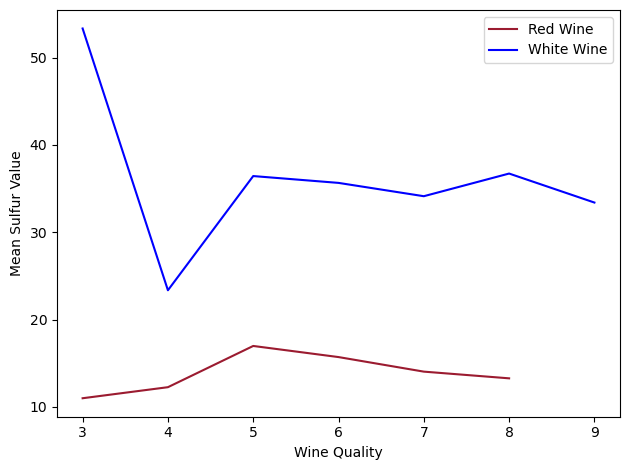

In [ ]:
fig, ax = plt.subplots(1,1)
mean_sulfur_value_red = red_wine.groupby("quality")["free_sulfur_dioxide"].mean()

mean_sulfur_red = sns.lineplot(x = mean_sulfur_value_red.index, y = mean_sulfur_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Sulfur Value")

mean_sulfur_value_white = white_wine.groupby("quality")["free_sulfur_dioxide"].mean()

mean_sulfur_white = sns.lineplot(x = mean_sulfur_value_white.index, y = mean_sulfur_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

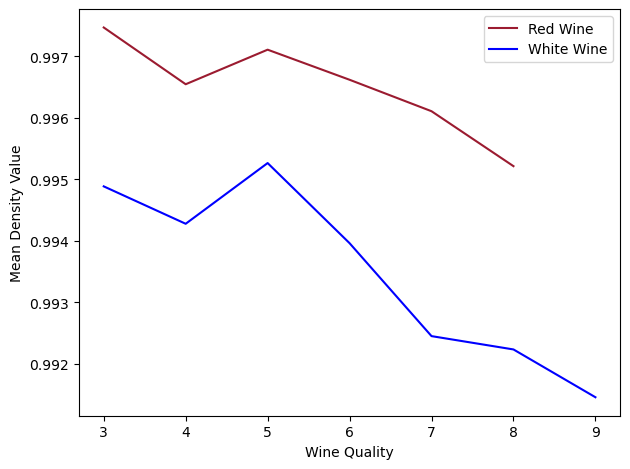

In [ ]:
fig, ax = plt.subplots(1,1)

mean_density_value_red = red_wine.groupby("quality")["density"].mean()

mean_density_red = sns.lineplot(x = mean_density_value_red.index, y = mean_density_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Density Value")

mean_density_value_white = white_wine.groupby("quality")["density"].mean()

mean_density_white = sns.lineplot(x = mean_density_value_white.index, y = mean_density_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()


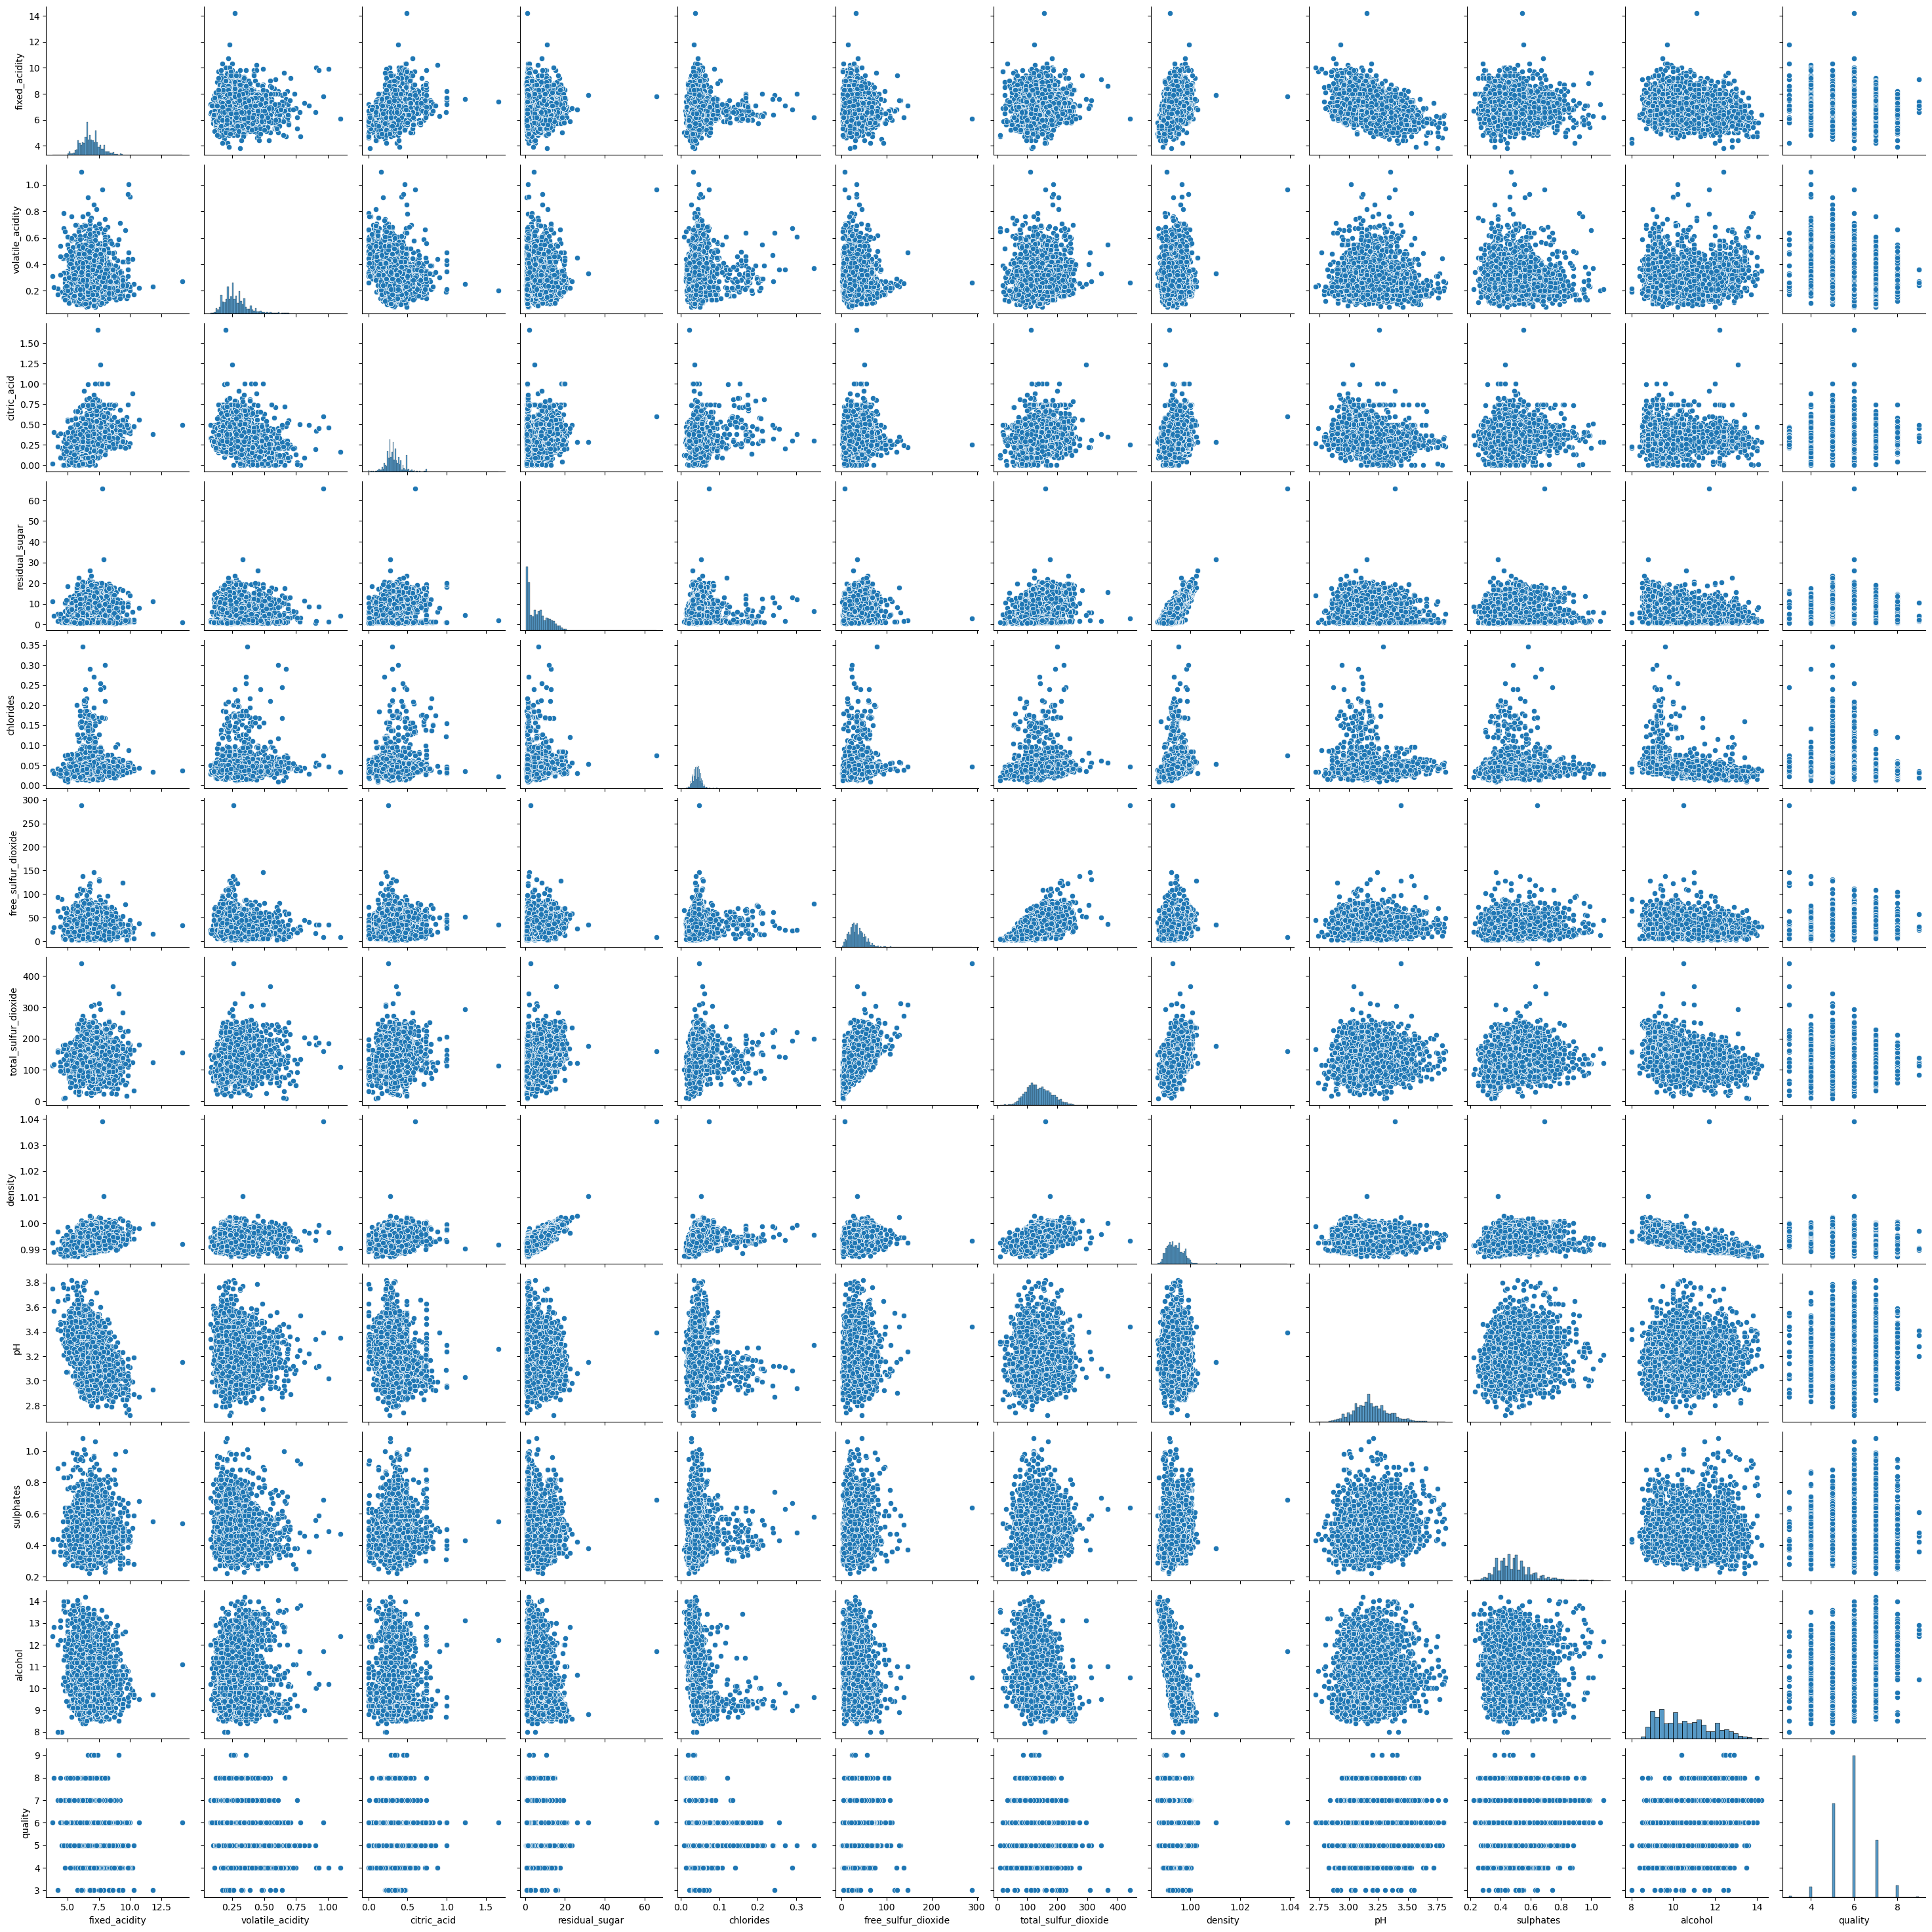

In [ ]:
sns.pairplot(white_wine)

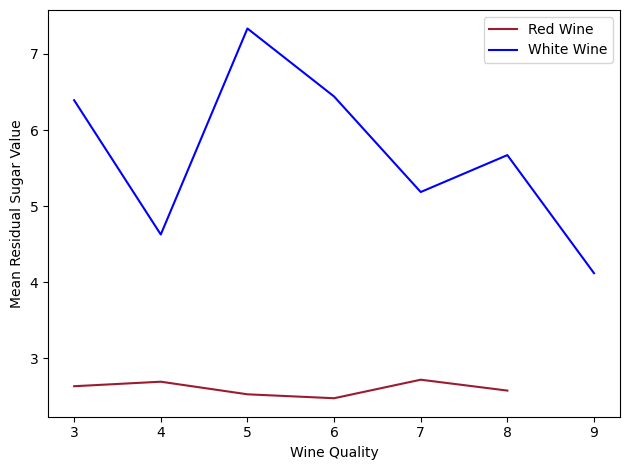

In [ ]:
## Residual sugar vs quality

fig, ax = plt.subplots(1,1)
mean_rs_value_red = red_wine.groupby("quality")["residual_sugar"].mean()

mean_rs_value_red = sns.lineplot(x = mean_rs_value_red.index, y = mean_rs_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Residual Sugar Value")

mean_rs_value_white = white_wine.groupby("quality")["residual_sugar"].mean()

mean_rs_white = sns.lineplot(x = mean_rs_value_white.index, y = mean_rs_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

D:\Users\Olunia\AppData\Local\Temp\ipykernel_26764\2362905411.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


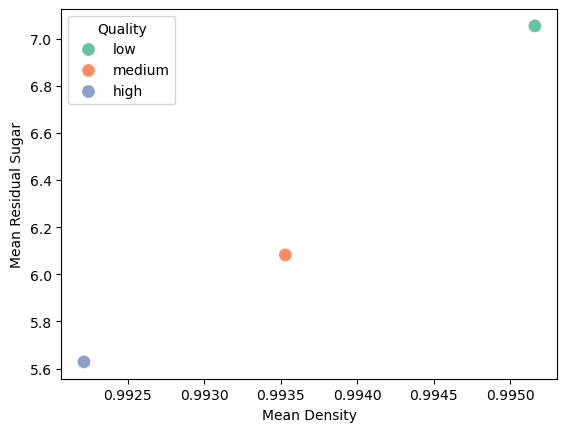

In [ ]:
### Residual sugar vs density / quality

# r = sns.stripplot(data = white_wine, x = "density", y = "residual_sugar")
# r.set(xlabel = "Density", ylabel = "Residual Sugar")
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Create a scatterplot where 'x' is 'density' and 'y' is 'residual_sugar'
r = sns.scatterplot(data=mean_values, x="density", y="residual_sugar", hue="quality_label", palette="Set2", s=100)

# Set labels for the plot
r.set(xlabel="Mean Density", ylabel="Mean Residual Sugar")

# Optional: Adjust the legend position
r.legend(title='Quality', loc='upper left')

plt.show()



D:\Users\Olunia\AppData\Local\Temp\ipykernel_26764\2164716595.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = red_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


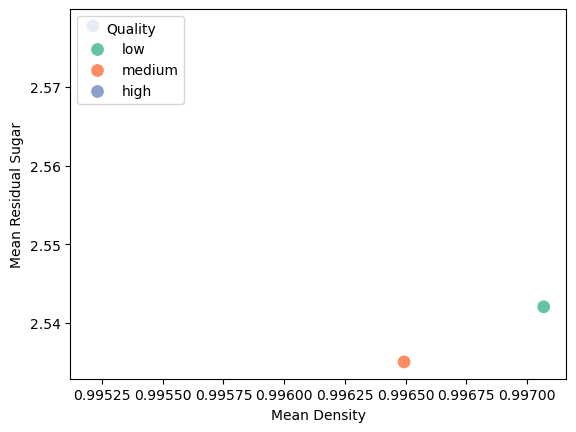

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = red_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Create a scatterplot where 'x' is 'density' and 'y' is 'residual_sugar'
r = sns.scatterplot(data=mean_values, x="density", y="residual_sugar", hue="quality_label", palette="Set2", s=100)

# Set labels for the plot
r.set(xlabel="Mean Density", ylabel="Mean Residual Sugar")

# Optional: Adjust the legend position
r.legend(title='Quality', loc='upper left')


D:\Users\Olunia\AppData\Local\Temp\ipykernel_26764\2951237438.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


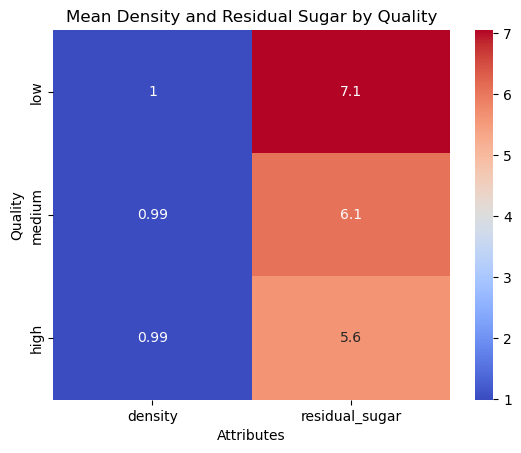

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Set 'quality' as the index
mean_values.set_index('quality_label', inplace=True)

# Create a heatmap
sns.heatmap(mean_values, annot=True, cmap="coolwarm", cbar=True)

# Set labels
plt.xlabel("Attributes")
plt.ylabel("Quality")
plt.title("Mean Density and Residual Sugar by Quality")

plt.show()


### Sprint 2

Text(0.65, 1.25, 'Red Wine Univariate Plots')

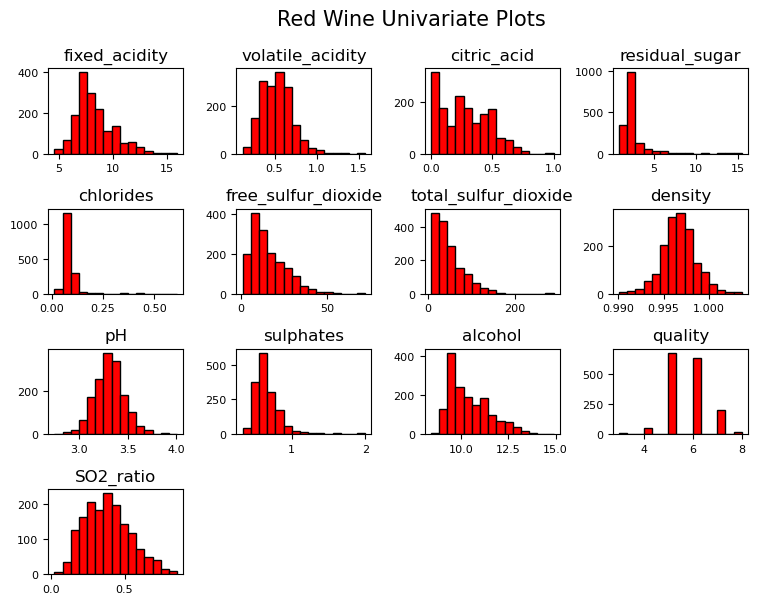

In [ ]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

Text(0.65, 1.25, 'White Wine Univariate Plots')

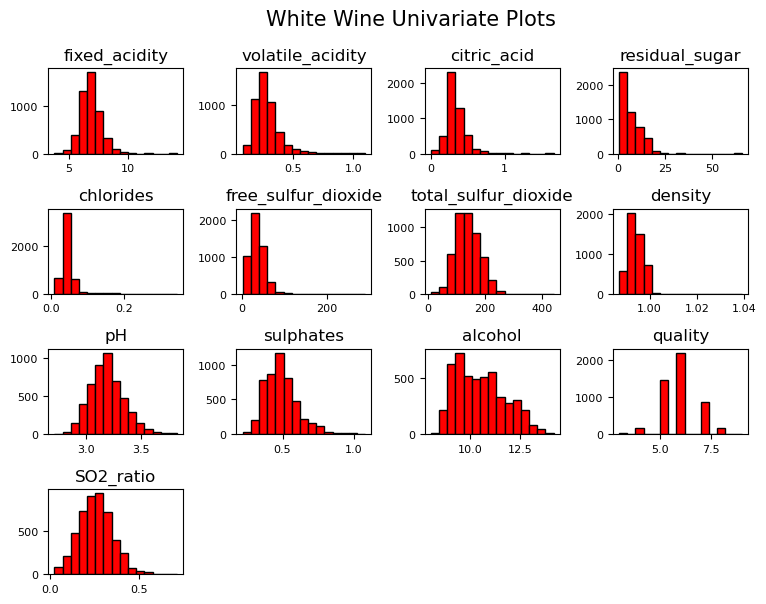

In [ ]:
white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

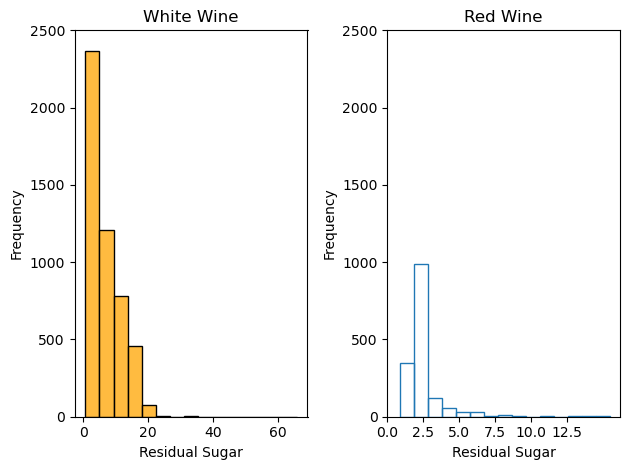

In [ ]:
fig, ax = plt.subplots(1,2)

rs_white = sns.histplot(data = white_wine, x = "residual_sugar", ax = ax[0], bins= 15, color = "orange")
rs_red = sns.histplot(data = red_wine, x = "residual_sugar", ax = ax[1], bins = 15, fill = False)
ax[0].set_ylim(0,2500)
ax[1].set_ylim(0,2500)

ax[1].set_xticks(np.arange(0, 15, step = 2.5))

ax[1].set_xlabel("Residual Sugar")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Red Wine")

ax[0].set_xlabel("Residual Sugar")
ax[0].set_ylabel("Frequency")
ax[0].set_title("White Wine")

plt.tight_layout()


<Axes: >

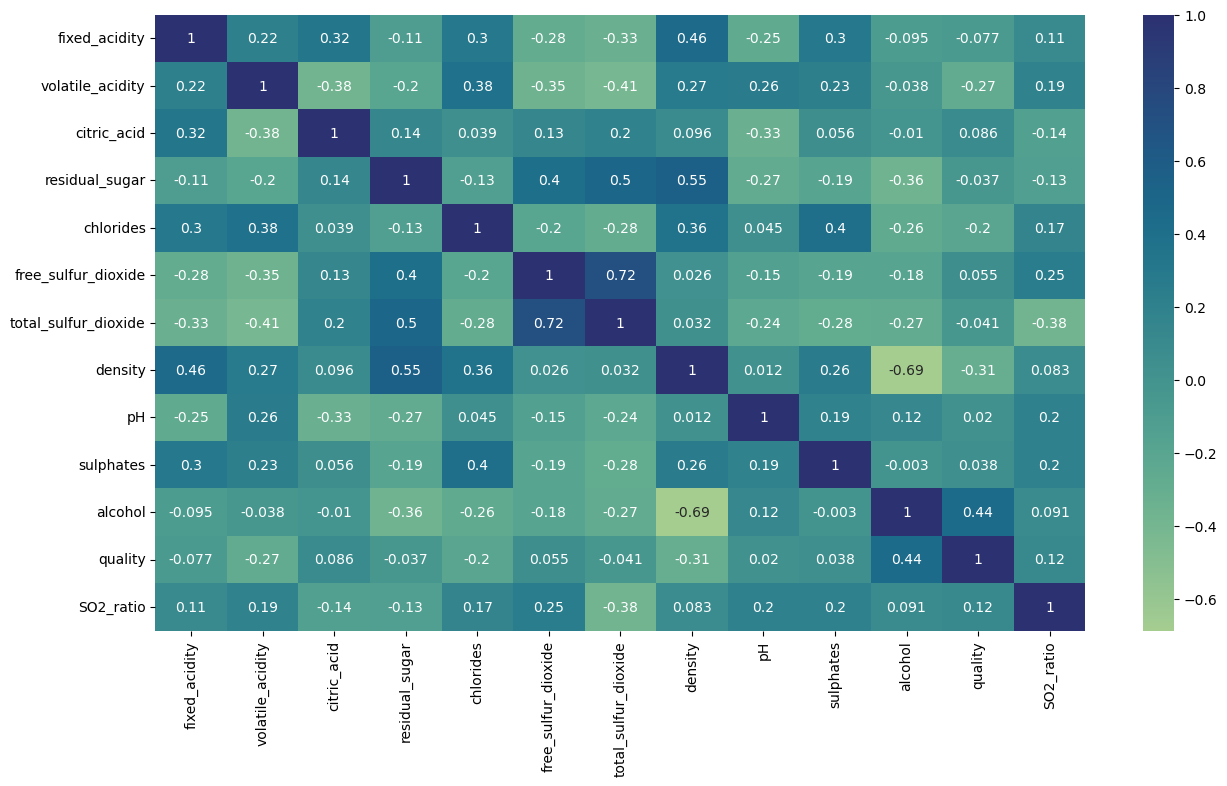

In [ ]:
fig = plt.figure(figsize=(15,8))
all_wines_numeric = all_wines.drop(columns = ["quality_label", "wine_type"])
corr_matrix = all_wines_numeric.corr()
sns.heatmap(data = corr_matrix, cmap = "crest", annot = True)

### Corr zero shows no correlation, where 1 is a strong correlation

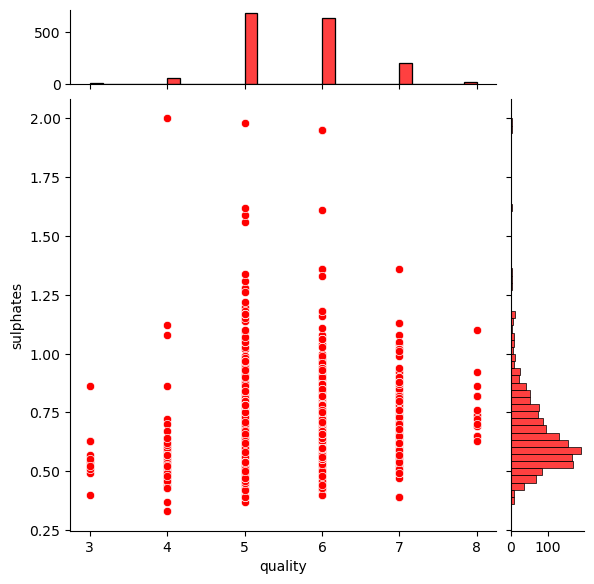

In [ ]:
sns.jointplot(data=red_wine, x='quality', y='sulphates', color= "red", marginal_ticks=True)

In [32]:
# Define a custom color palette for each quality label
red_wine["quality_label"] = pd.Categorical(red_wine["quality_label"])
custom_palette = ["#ff9f9b","#fffea3","#a1c9f4"]
sns.set_palette(custom_palette)
sns.scatterplot(
    data=red_wine, x="alcohol", y="sulphates", hue="quality_label",
    hue_norm=(0, 7), legend="full"
)

ValueError: Unable to parse string "low" at position 0

In [ ]:
from scipy import stats
from scipy.stats import shapiro

F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['alcohol'],
    red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
    red_wine[red_wine['quality_label'] == 'high']['alcohol']
)
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


In [ ]:
# Red Wine / SO2 Ratio
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['SO2_ratio'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

# ANOVA is ok, cause data is normally distributed
F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['SO2_ratio'],
    red_wine[red_wine['quality_label'] == 'medium']['SO2_ratio'],
    red_wine[red_wine['quality_label'] == 'high']['SO2_ratio']
)
print('ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

Shapiro-Wilk Test: Stat=0.9862099103331893, p-value=2.0535637197902008e-11
ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings
F Statistic: 45.194253385286714 	p-value: 8.091930535200915e-20


In [ ]:
# White Wine / SO2 Ratio

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['SO2_ratio'],
    white_wine[white_wine['quality_label'] == 'medium']['SO2_ratio'],
    white_wine[white_wine['quality_label'] == 'high']['SO2_ratio']
)
print('ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings
F Statistic: 83.78733913009978 	p-value: 1.6619506290953235e-36


In [ ]:
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['fixed_acidity'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['fixed_acidity'],
    white_wine[white_wine['quality_label'] == 'medium']['fixed_acidity'],
    white_wine[white_wine['quality_label'] == 'high']['fixed_acidity']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

Shapiro-Wilk Test: Stat=0.967993091842366, p-value=1.3161925990842658e-18
ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 21.923026494425756 	p-value: 3.321537387880916e-10


In [ ]:
# ANOVA Test  - most suitable for data that is normally distributed
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['pH'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['pH'],
    white_wine[white_wine['quality_label'] == 'medium']['pH'],
    white_wine[white_wine['quality_label'] == 'high']['pH']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#if data is not normally distributed: 

from scipy.stats import kruskal

# Kruskal-Wallis test for pH across the quality groups
stat, p_value = kruskal(
    white_wine[white_wine['quality_label'] == 'low']['pH'],
    white_wine[white_wine['quality_label'] == 'medium']['pH'],
    white_wine[white_wine['quality_label'] == 'high']['pH']
)
print(f'Kruskal-Wallis Test: Stat={stat}, p-value={p_value}')

Shapiro-Wilk Test: Stat=0.9745520399853915, p-value=1.8618895687188931e-16
ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 19.690945958199926 	p-value: 3.0377212959215113e-09
Kruskal-Wallis Test: Stat=45.91385226298163, p-value=1.0713556385138677e-10


In [ ]:
F, p = stats.f_oneway(
    all_wines[all_wines['quality_label'] == 'low']['chlorides'],
    all_wines[all_wines['quality_label'] == 'medium']['chlorides'],
    all_wines[all_wines['quality_label'] == 'high']['chlorides']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 120.96013685200977 	p-value: 2.645627533466762e-52
